In [1]:
import pandas as pd
import numpy as np 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/tourism_protothema.tsv", sep='\t')

In [4]:
df.head()

Unnamed: 0  ...                       date
0           0  ...  2021-06-20T08:56:09+03:00
1           1  ...  2021-06-19T08:35:00+03:00
2           2  ...  2021-06-18T14:58:40+03:00
3           3  ...  2021-06-18T06:23:00+03:00
4           4  ...  2021-06-17T23:39:00+03:00

[5 rows x 4 columns]

In [5]:
df['date'].replace ('T', '')

0      2021-06-20T08:56:09+03:00
1      2021-06-19T08:35:00+03:00
2      2021-06-18T14:58:40+03:00
3      2021-06-18T06:23:00+03:00
4      2021-06-17T23:39:00+03:00
                 ...            
885    2020-06-29T09:59:14+03:00
886    2020-06-29T09:57:25+03:00
887    2020-06-29T09:55:00+03:00
888    2020-06-29T07:00:00+03:00
889    2020-06-28T22:12:00+03:00
Name: date, Length: 890, dtype: object

In [77]:
df['headline'].replace ('/n', '')
df.head()

Unnamed: 0  ...                       date
0           0  ...  2021-06-20T08:56:09+03:00
1           1  ...  2021-06-19T08:35:00+03:00
2           2  ...  2021-06-18T14:58:40+03:00
3           3  ...  2021-06-18T06:23:00+03:00
4           4  ...  2021-06-17T23:39:00+03:00

[5 rows x 4 columns]

In [6]:
df.dtypes

Unnamed: 0     int64
headline      object
url           object
date          object
dtype: object

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [8]:
text = df['headline'].str.cat(sep = ' ').replace("amp", ' ')


In [9]:
text

'\nΗ όμορφη Ελλάδα μας!\n \nΑξιολόγηση οικονομίας: Έπαινοι και διεθνή εγκώμια στη χώρα μας από Εταίρους και ξένους Οίκους\n \nΚοινωνικός Τουρισμός – ΟΑΕΔ: Μέχρι πότε ισχύει η παράταση για τις αιτήσεις\n \nΗ οικογένεια Σκλαβενίτη που έκανε το Μεγανήσι VIP προορισμό\n \nΗ Γερμανία ανοίγει τα σύνορα για τους πλήρως εμβολιασμένους από τρίτες χώρες\n \nΚοινωνικός Τουρισμός 2021: Εκπνέει η προθεσμία για τις αιτήσεις – Οδηγίες της τελευταίας στιγμής\n \nSelf test: Τι αλλάζει από τον Ιούλιο - Ποιοι θα εξαιρεθούν και πώς θα γίνει η διανομή τους\n \nΚοινωνικός Τουρισμός: Διακοπές για 300.000 εργαζόμενους και ανέργους - Λήγει απόψε η προθεσμία\n \nΜιχάλης Μανιάτης: Ζω σε μια σπηλιά με υπαίθριο μπάνιο και κουζίνα - Η ζωή του μεταξύ Κίνας και Κυπαρισσίας\n \nRyanair κατά Μπόρις Τζόνσον: Οι πλήρως εμβολιασμένοι Βρετανοί να μπορούν να επισκεφθούν την Ευρώπη\n \nΜπας και είσαι εσύ και δεν το ξέρεις;\n \nΟι «κατινιές» ενός τραπεζίτη, το τριζάτο ακίνητο στη Φιλοθέη και ο παράξενος διαγωνισμός του Υπερτα

In [10]:
list(STOPWORDS)[0:20]

['hers',
 'again',
 "isn't",
 'out',
 "we'd",
 'under',
 'have',
 'because',
 "we'll",
 'like',
 'into',
 "wasn't",
 'about',
 'cannot',
 "what's",
 'before',
 "they've",
 'is',
 'theirs',
 'i']

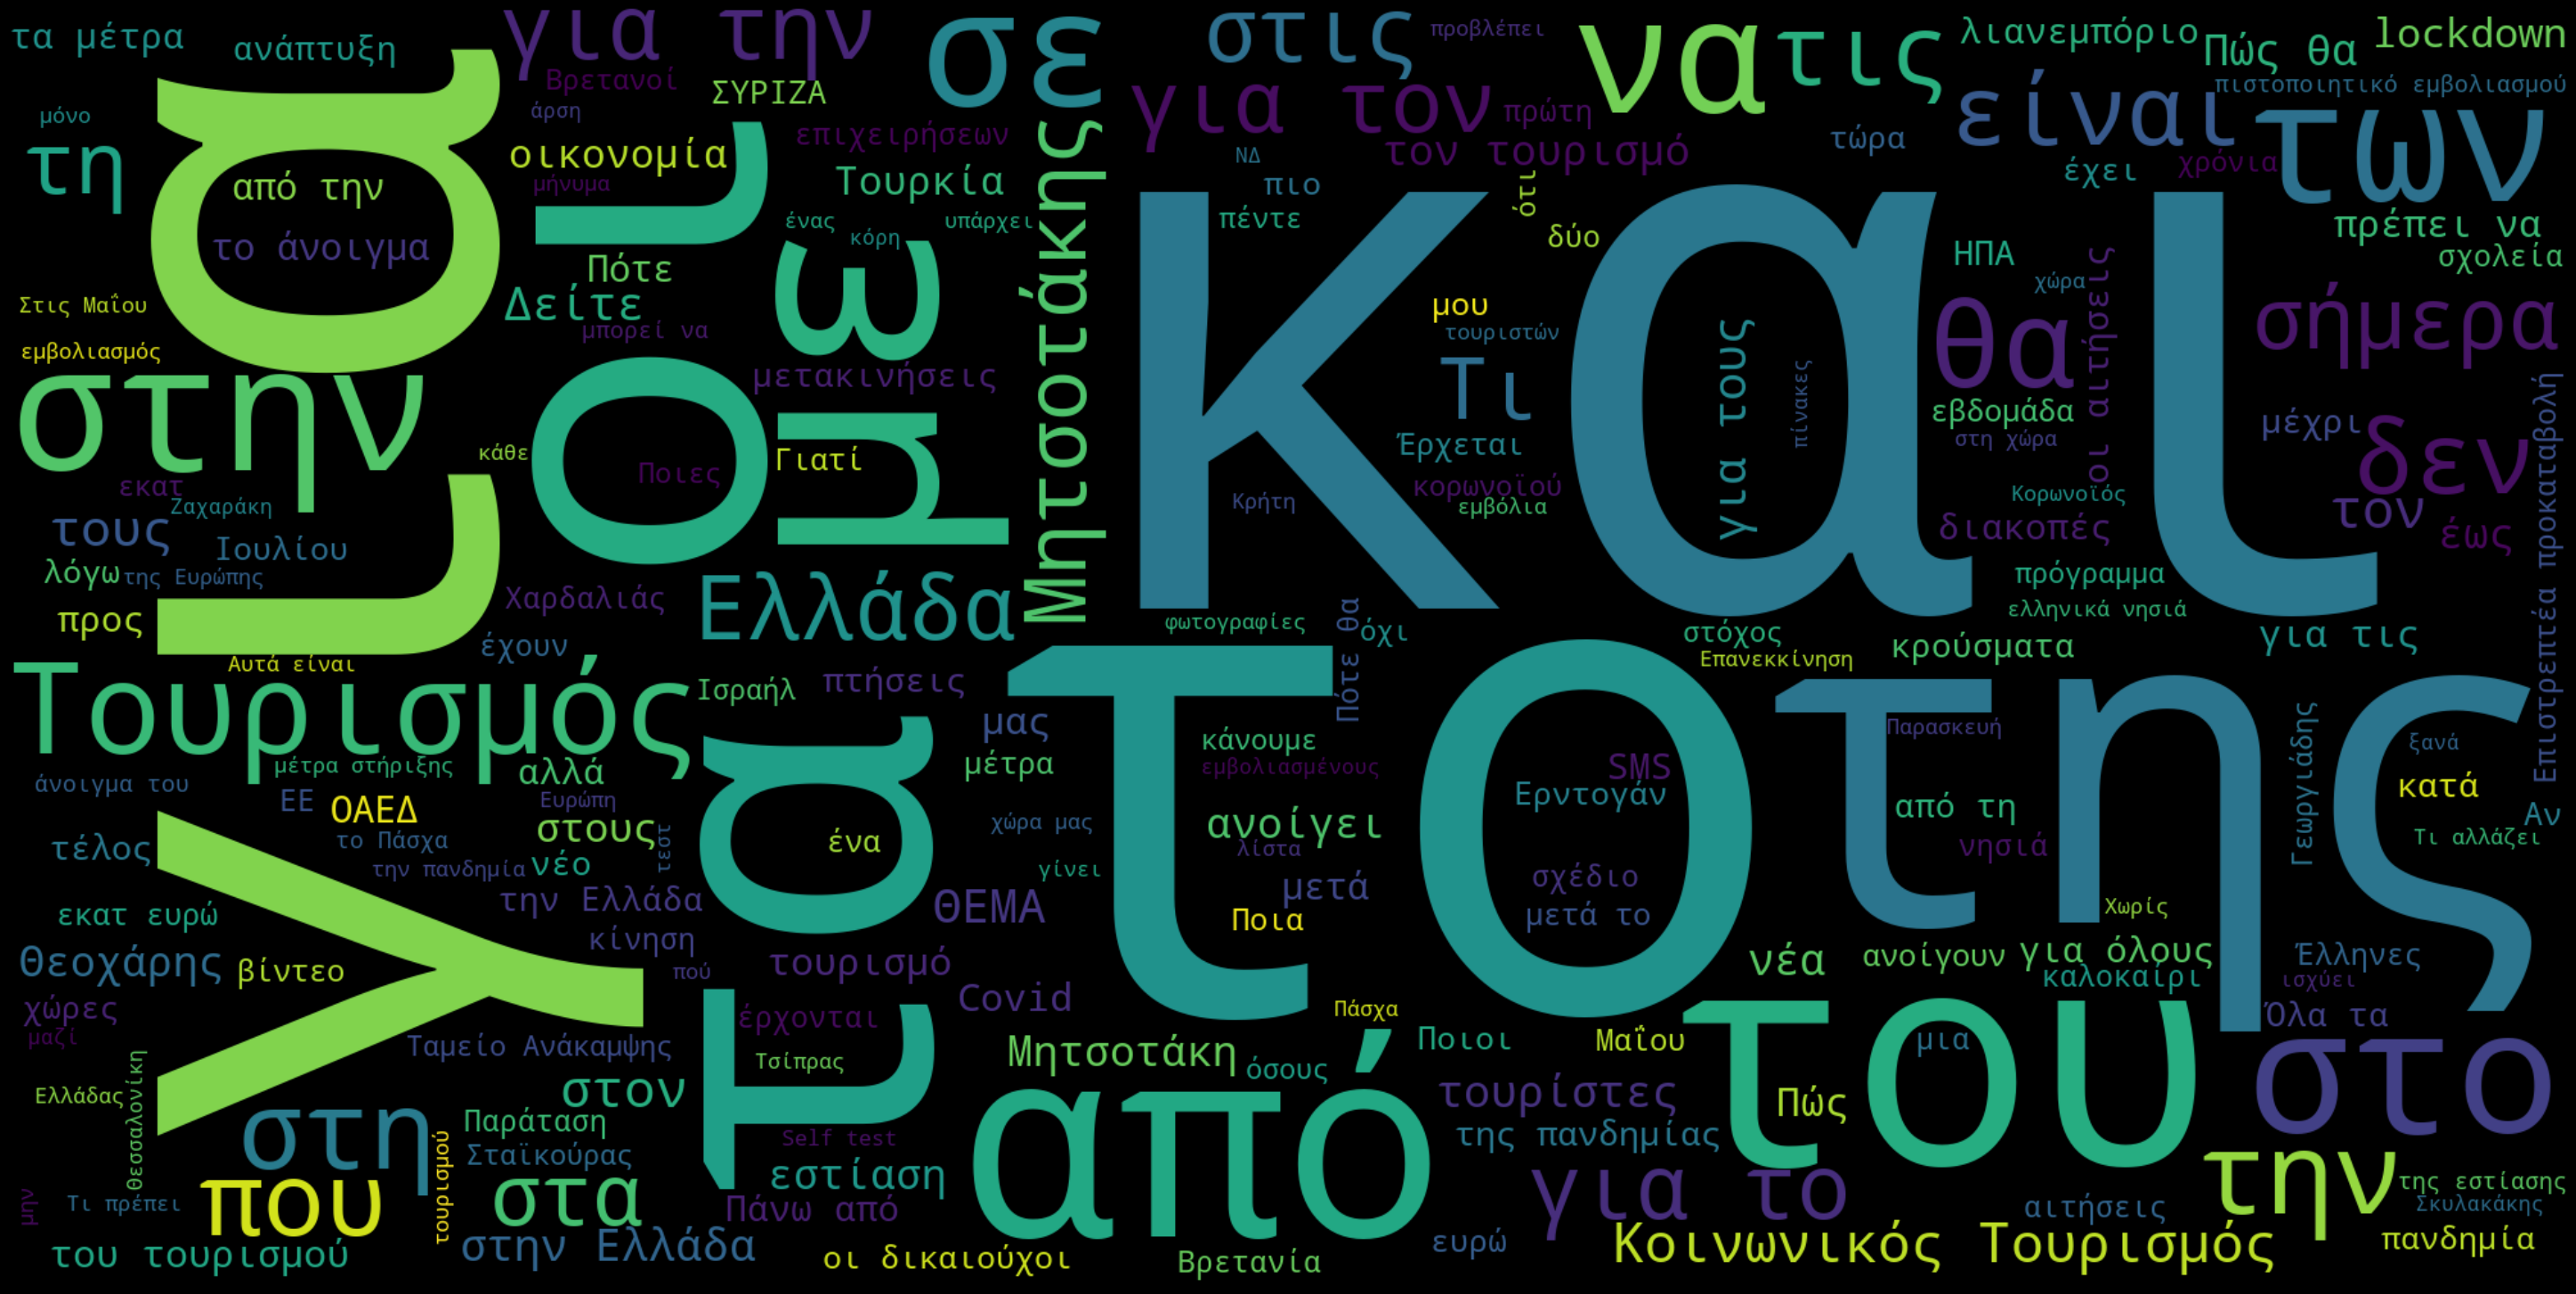

In [11]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [12]:
import spacy

In [13]:
!python -m spacy download el_core_news_sm

# Επειτα κάνουμε Runtime ->  Restart Runtime, για να δει τις αλλαγές από το download...

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [14]:
nlp = spacy.load('el_core_news_sm')

In [15]:
list(nlp.Defaults.stop_words)[0:20]

['βέβαια',
 'τέτοιαν',
 'τίποτα',
 'ξαφνικά',
 'κάποιον',
 'άλλους',
 'αυτό',
 'μας',
 'χωρίς',
 'έξω',
 'εαυτούς',
 'όλου',
 'ωστόσο',
 'γι',
 'μετά',
 'εξήσ',
 'πλην',
 'λοιπόν',
 'άλλοι',
 'είχε']

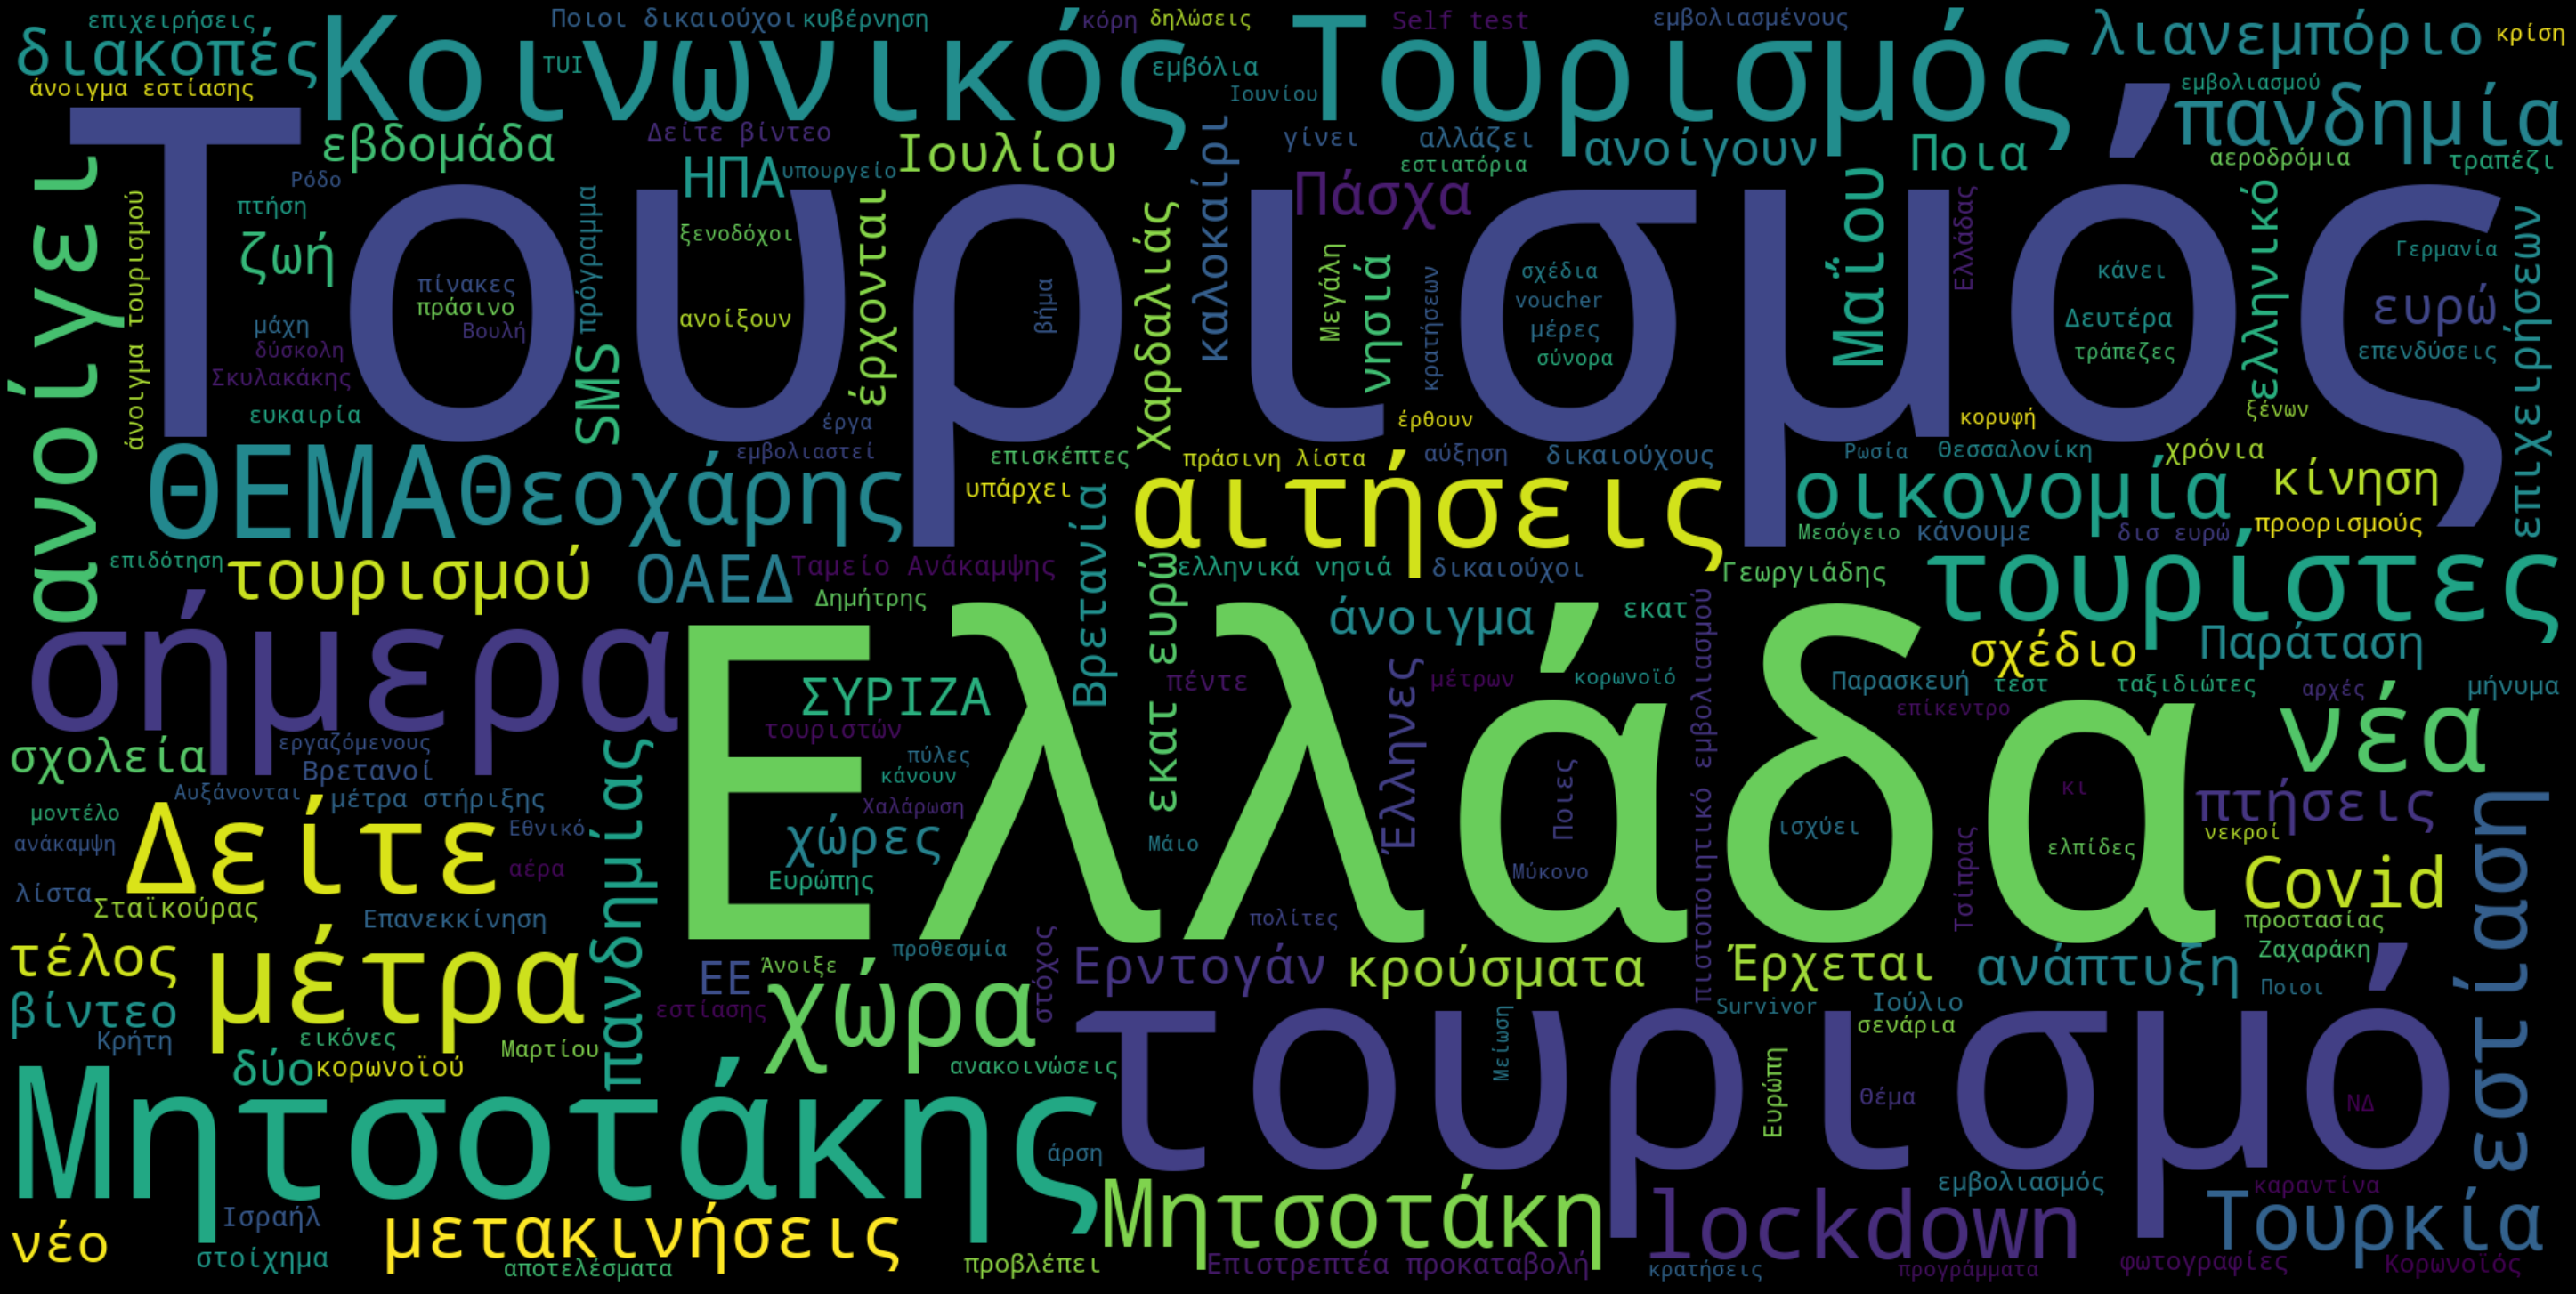

In [16]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [17]:
doc = nlp(df['headline'][1])

In [18]:
for token in doc:
    print(token, token.lemma_)


 

Αξιολόγηση αξιολόγηση
οικονομίας οικονομία
: :
Έπαινοι έπαινος
και και
διεθνή διεθνός
εγκώμια εγκώμια
στη στη
χώρα χώρα
μας μας
από από
Εταίρους εταίρου
και και
ξένους ξένους
Οίκους οίκους

 



In [19]:
' '.join(token.lemma_ for token in doc)

'\n αξιολόγηση οικονομία : έπαινος και διεθνός εγκώμια στη χώρα μας από εταίρου και ξένους οίκους \n'

In [20]:
text

'\nΗ όμορφη Ελλάδα μας!\n \nΑξιολόγηση οικονομίας: Έπαινοι και διεθνή εγκώμια στη χώρα μας από Εταίρους και ξένους Οίκους\n \nΚοινωνικός Τουρισμός – ΟΑΕΔ: Μέχρι πότε ισχύει η παράταση για τις αιτήσεις\n \nΗ οικογένεια Σκλαβενίτη που έκανε το Μεγανήσι VIP προορισμό\n \nΗ Γερμανία ανοίγει τα σύνορα για τους πλήρως εμβολιασμένους από τρίτες χώρες\n \nΚοινωνικός Τουρισμός 2021: Εκπνέει η προθεσμία για τις αιτήσεις – Οδηγίες της τελευταίας στιγμής\n \nSelf test: Τι αλλάζει από τον Ιούλιο - Ποιοι θα εξαιρεθούν και πώς θα γίνει η διανομή τους\n \nΚοινωνικός Τουρισμός: Διακοπές για 300.000 εργαζόμενους και ανέργους - Λήγει απόψε η προθεσμία\n \nΜιχάλης Μανιάτης: Ζω σε μια σπηλιά με υπαίθριο μπάνιο και κουζίνα - Η ζωή του μεταξύ Κίνας και Κυπαρισσίας\n \nRyanair κατά Μπόρις Τζόνσον: Οι πλήρως εμβολιασμένοι Βρετανοί να μπορούν να επισκεφθούν την Ευρώπη\n \nΜπας και είσαι εσύ και δεν το ξέρεις;\n \nΟι «κατινιές» ενός τραπεζίτη, το τριζάτο ακίνητο στη Φιλοθέη και ο παράξενος διαγωνισμός του Υπερτα

In [21]:
full_doc = nlp(text)

In [22]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [23]:
clear_text[200:400]

' \n η οικογένεια σκλαβενίτη που κάνω το Μεγανήσι vip προορισμό \n \n η Γερμανία ανοίγω τα σύνορο για τους πλήρως εμβολιασμένους από τρίτες χώρα \n \n κοινωνικός τουρισμό 2021 : εκπνέω η προθεσμίας για τις '

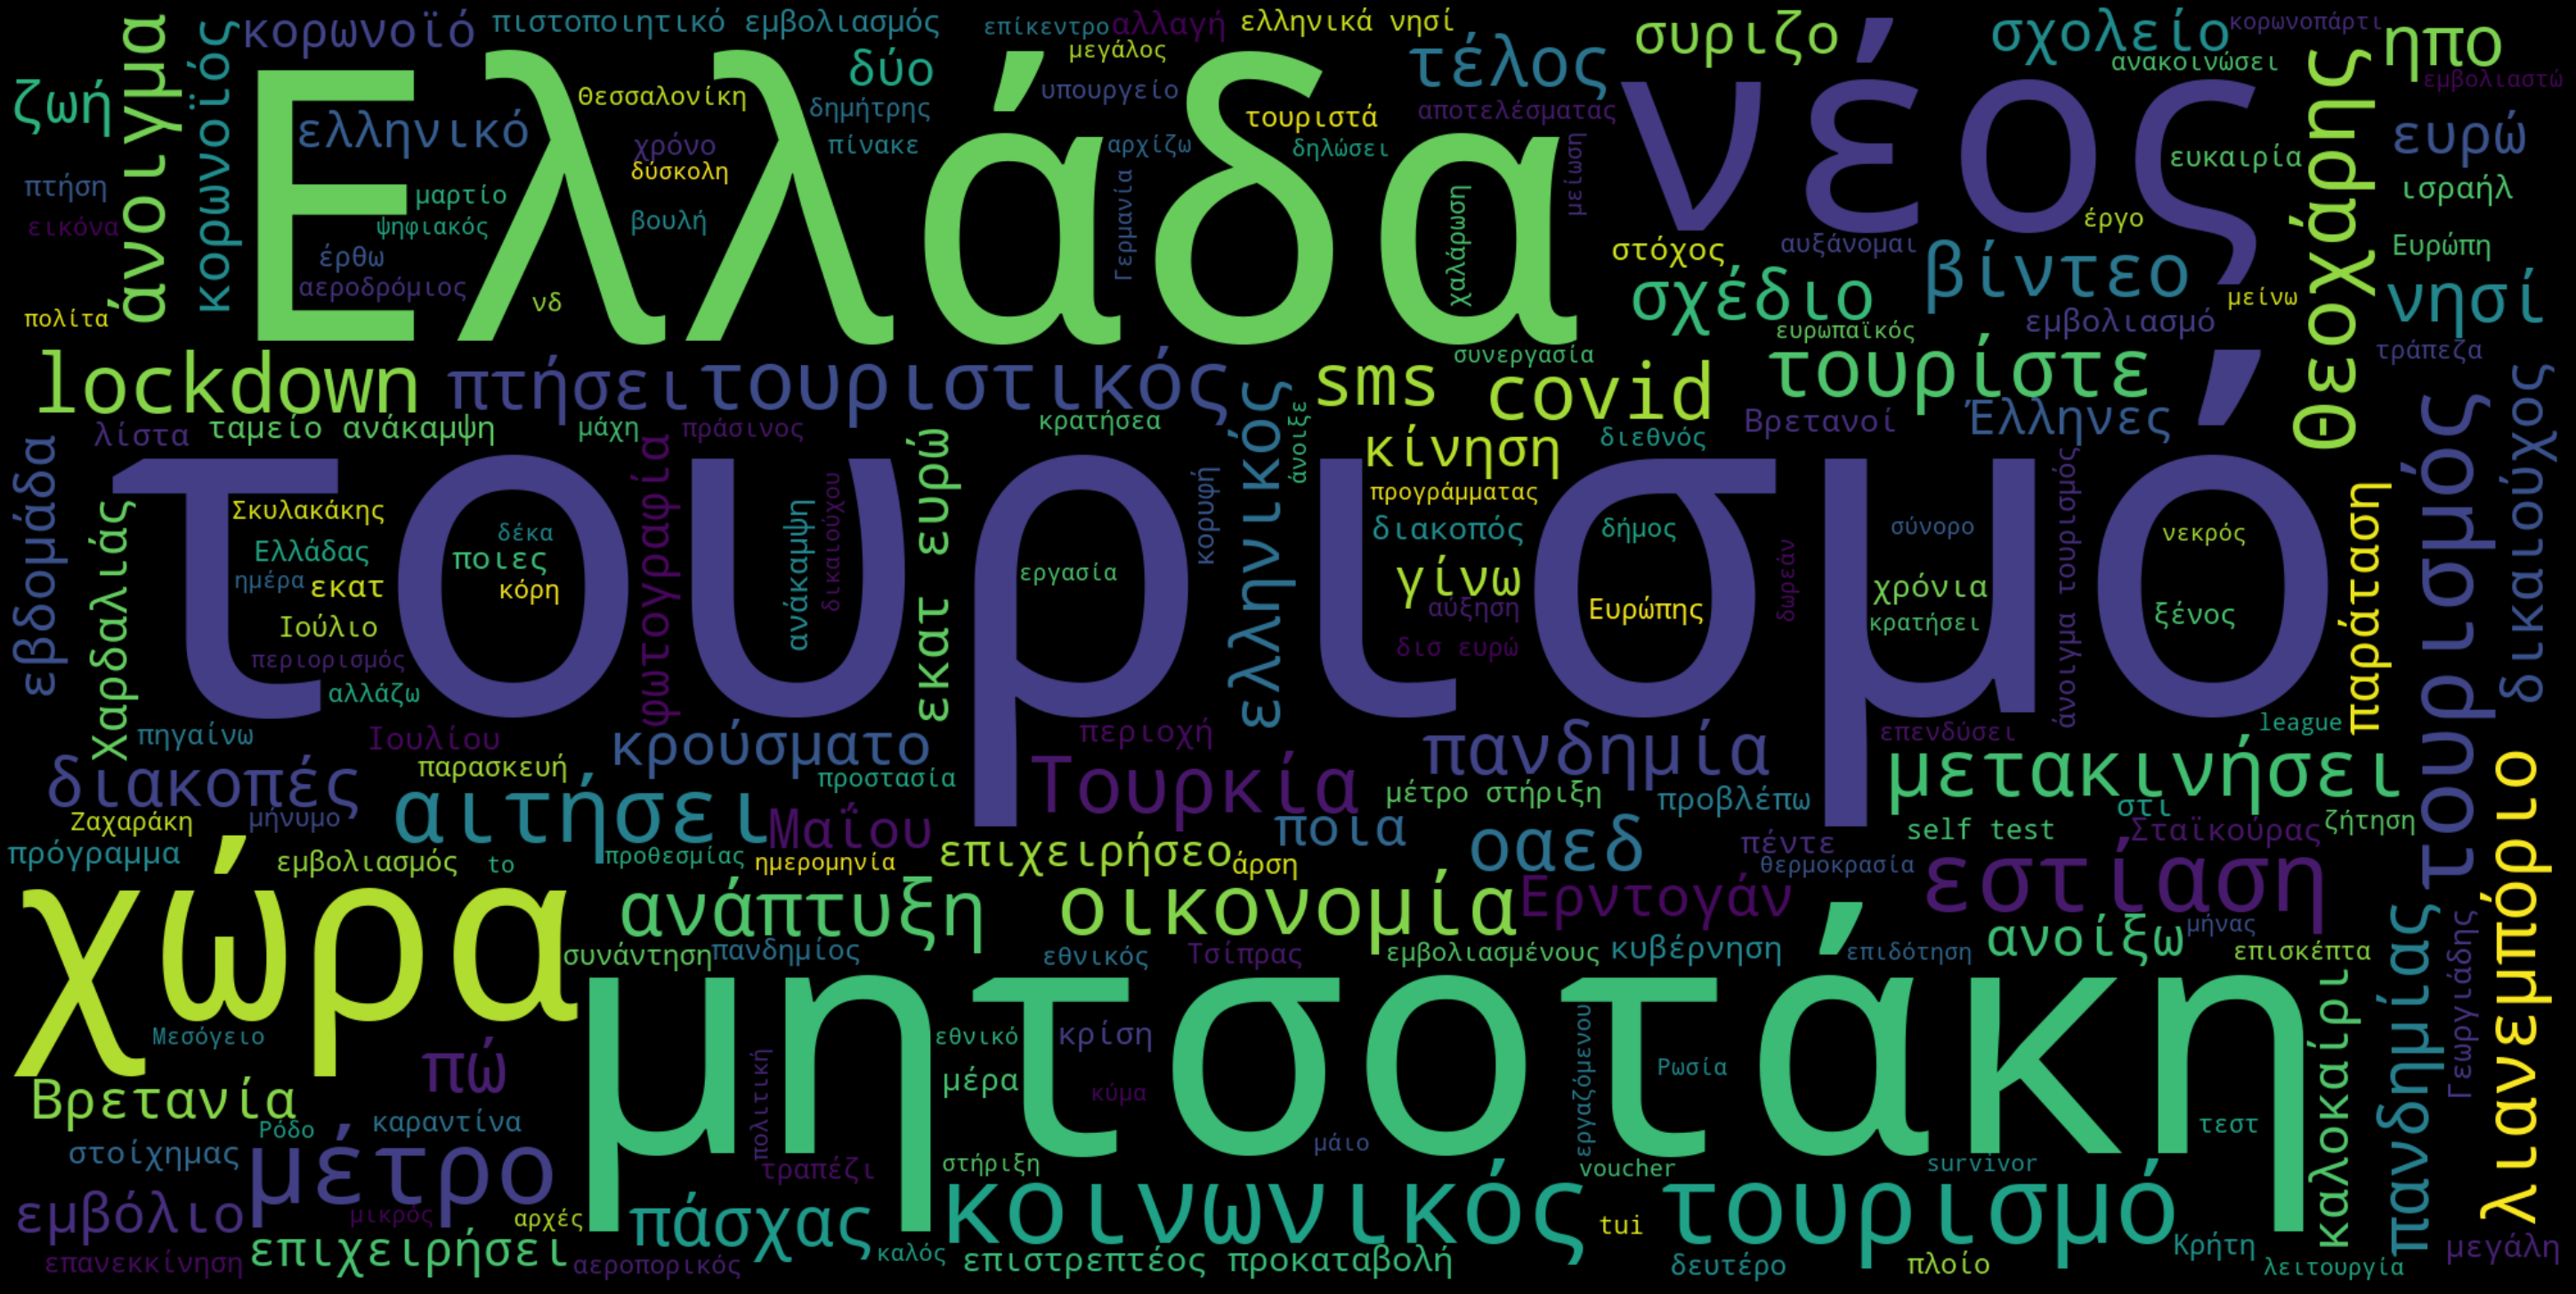

In [24]:
wordcloud = WordCloud(
    stopwords = ['δείτε','104','θέμα','σήμερα','000', 'έρχομαι', 'ανοίγω', 'θεμος', 'κάνω', 'λέω', 'θέλω', 'πάσχο', 'μπορώ', 'υπάρχω', 'εε', 'ισχύω', 'ζητώ', 'ποιος', 'δυο']+ list(nlp.Defaults.stop_words),
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Vectorization starts here......

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [26]:
count_vector = cv.fit_transform(df['headline'])

In [27]:
count_vector.shape

(890, 3536)

In [28]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


000  10  100  104  10ήμερο  11  ...  ύπουλο  ύφεση  ύψη  ύψους  ώρα  ώρες
0    0   0    0    0        0   0  ...       0      0    0      0    0     0
1    0   0    0    0        0   0  ...       0      0    0      0    0     0
2    0   0    0    0        0   0  ...       0      0    0      0    0     0
3    0   0    0    0        0   0  ...       0      0    0      0    0     0
4    0   0    0    0        0   0  ...       0      0    0      0    0     0

[5 rows x 3536 columns]

In [29]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [30]:
count_vector = cv.fit_transform(df['headline'])

In [31]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


000  104  19  2020  2021  ...  τουρισμό  τουρισμός  τουρκία  χώρα  χώρες
0    0    0   0     0     0  ...         0          0        0     0      0
1    0    0   0     0     0  ...         0          0        0     1      0
2    0    0   0     0     0  ...         0          1        0     0      0
3    0    0   0     0     0  ...         0          0        0     0      0
4    0    0   0     0     0  ...         0          0        0     0      1

[5 rows x 68 columns]

In [32]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [33]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκασα', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατο', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστο', 'ετέρο', 'ετούτε', 'ευθύ', 'εχτά', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιής', 'ποιώ', 'πολλός', 'προχθής', 'προχτής', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τούτε', 'όποι', 'όσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


...  104,6  2020  2021  ...  τουρκία  υπάρχω  φωτογραφία  χώρα
0    0      0     0     0  ...        0       0           0     0
1    0      0     0     0  ...        0       0           0     1
2    0      0     0     0  ...        0       0           0     0
3    0      0     0     0  ...        0       0           0     0
4    0      0     0     0  ...        0       0           0     1

[5 rows x 72 columns]

In [34]:
 cv = CountVectorizer( stop_words = ['δείτε','104','θέμα','σήμερα','000', 'έρχομαι', 'ανοίγω', 'θεμος', 'κάνω', 'λέω', 'θέλω', 'πάσχο', 'μπορώ', 'υπάρχω', 'εε', 'ισχύω', 'ζητώ', 'ποιος', 'δυο']+ list(nlp.Defaults.stop_words), max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()




2020  2021  άνοιγμα  αιτήσεις  ...  τουρισμού  τουρισμό  τουρισμός  χώρα
0     0     0        0         0  ...          0         0          0     0
1     0     0        0         0  ...          0         0          0     1
2     0     0        0         1  ...          0         0          1     0
3     0     0        0         0  ...          0         0          0     0
4     0     0        0         0  ...          0         0          0     0

[5 rows x 20 columns]

In [35]:
common_words=results.sum(axis=0)
common_words.sort_values(ascending=False).head(15)

τουρισμός     104
ελλάδα         67
τουρισμό       37
μητσοτάκης     33
2021           32
κοινωνικός     30
τουρισμού      28
μέτρα          28
ευρώ           24
θεμα           23
αιτήσεις       21
τουρίστες      20
άνοιγμα        20
νέα            19
χώρα           18
dtype: int64

In [36]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


κυβέρνηση  κυβέρνησης  κυβερνητικές  ...  κυριακή  κυριαρχία  κυρώσεις
0          0           0             0  ...        0          0         0
1          0           0             0  ...        0          0         0
2          0           0             0  ...        0          0         0
3          0           0             0  ...        0          0         0
4          0           0             0  ...        0          0         0

[5 rows x 17 columns]

In [37]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000 αιτήσεις  300 000  ...  τουρισμός 2020  τουρισμός 2021
0             0        0  ...               0               0
1             0        0  ...               0               0
2             0        0  ...               0               0
3             0        0  ...               0               0
4             0        0  ...               0               0

[5 rows x 20 columns]

In [38]:
results.sum(axis =0).sort_values(ascending = False)

κοινωνικός τουρισμός         30
θεμα 104                     23
εκατ ευρώ                     9
τουρισμός 2021                8
επιστρεπτέα προκαταβολή       8
ταμείο ανάκαμψης              7
300 000                       7
πιστοποιητικό εμβολιασμού     7
τουρισμός 2020                7
δείτε βίντεο                  6
covid 19                      6
self test                     6
άνοιγμα τουρισμού             6
ελληνικά νησιά                6
μέτρα στήριξης                6
ποιοι δικαιούχοι              6
δισ ευρώ                      5
άνοιγμα εστίασης              5
πράσινη λίστα                 5
000 αιτήσεις                  5
dtype: int64

In [39]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   


κοινωνικός τουρισμός       30
θεμα 104                   23
εκατ ευρώ                   9
τουρισμός 2021              8
επιστρεπτέα προκαταβολή     8
dtype: int64

In [40]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bcov[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

covid  covid-19  covid-free
0      0         0           0
1      0         0           0
2      0         0           0
3      0         0           0
4      0         0           0

In [41]:
results.sum(axis =0).sort_values(ascending = False)

covid         9
covid-19      5
covid-free    1
dtype: int64

In [42]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['covid19', 'τουρισμος']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


covid19  τουρισμος
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [170]:
df3=df['headline']

In [171]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df3)  #finds the tfidf score with normalization


In [172]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000   10  100  104   11   12  ...  ωράριο  όνειρο  όπλα  όρους  ύφεση  ύψους
0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   0.0    0.0    0.0    0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   0.0    0.0    0.0    0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   0.0    0.0    0.0    0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   0.0    0.0    0.0    0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   0.0    0.0    0.0    0.0

[5 rows x 500 columns]

In [173]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.32500631
  0.59486462 0.         0.34643363 0.         0.31351058 0.
  0.         0.         0.32333643 0.30657744 0.         0.
  0.         0.         0.29432478 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.28729546 0.
  0.         0.         0.         0.         0.         0.
  0.33133689 0.         0.         0.         0.67909474 0.
  0.         

In [174]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [175]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
arr

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

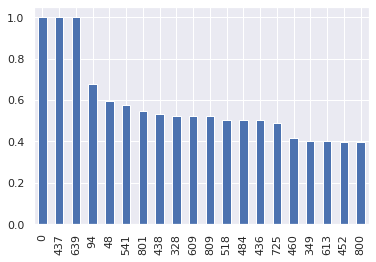

In [177]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [191]:
df['headline'].loc[0]

'\nΗ όμορφη Ελλάδα μας!\n'

In [178]:
df['headline'].loc[437]

'\nΗ Ελλάδα ως ιδέα\n'

In [180]:
df['url'].loc[0]

'https://www.protothema.gr/blogs/p-ilias-makos/article/1135476/i-omorfi-ellada-mas/'

In [181]:
df['url'].loc[437]

'https://www.protothema.gr/blogs/tasos-gaitanis/article/1108033/i-ellada-os-idea/'

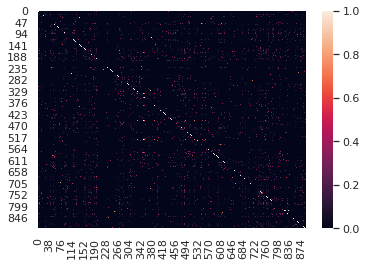

In [182]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(arr)
